In [1]:
# fmt: off
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%load_ext jupyter_black
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from pyiturr5etc import ureg
plt.style.use("mls_scf")
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('__')]


In [2]:
import pint

In [3]:
%autoreload 2

In [4]:
from pyiturr5etc import pyiturr5 as rr

In [5]:
data = rr.parse_rr_file()

Reading from pdf file: RR5-6, RR5-7, RR5-8, RR5-9, RR5-10, RR5-11, 

/Users/livesey/corf/pyiturr5etc/src/pyiturr5etc/pyiturr5/parse_rr_pdf.py:362: UserWarning: Unable to parse table row, missing band
  warnings.warn("Unable to parse table row, missing band")


RR5-12, RR5-13, RR5-14, RR5-15, RR5-16, RR5-17, RR5-18, RR5-19, RR5-20, RR5-21, RR5-22, RR5-23, RR5-24, RR5-25, RR5-26, RR5-27, RR5-28, RR5-29, RR5-30, RR5-31, RR5-32, RR5-33, RR5-34, RR5-35, RR5-36, RR5-37, RR5-38, RR5-39, RR5-40, RR5-41, RR5-42, RR5-43, RR5-44, RR5-45, RR5-46, RR5-47, RR5-48, RR5-49, RR5-50, RR5-51, RR5-52, RR5-53, RR5-54, RR5-55, RR5-56, RR5-57, RR5-58, RR5-59, RR5-60, RR5-61, RR5-62, RR5-63, RR5-64, RR5-65, RR5-66, RR5-67, RR5-68, RR5-69, RR5-70, RR5-71, RR5-72, RR5-73, RR5-74, RR5-75, RR5-76, RR5-77, RR5-78, RR5-79, RR5-80, RR5-81, RR5-82, RR5-83, RR5-84, RR5-85, RR5-86, RR5-87, RR5-88, RR5-89, RR5-90, RR5-91, RR5-92, RR5-93, RR5-94, RR5-95, RR5-96, RR5-97, RR5-98, RR5-99, RR5-100, RR5-101, RR5-102, RR5-103, RR5-104, RR5-105, RR5-106, RR5-107, RR5-108, RR5-109, RR5-110, RR5-111, RR5-112, RR5-113, RR5-114, RR5-115, RR5-116, RR5-117, RR5-118, RR5-119, RR5-120, RR5-121, RR5-122, RR5-123, RR5-124, RR5-125, RR5-126, RR5-127, RR5-128, RR5-129, RR5-130, RR5-131, RR5-132,

In [8]:
def band_is_wanted(b: rr.Band) -> bool:
    return (
        False
        or b.has_allocation("FIXED-SATELLITE")
        or b.has_allocation("MOBILE-SATELLITE")
        or b.has_allocation("BROADCASTING-SATELLITE")
        or b.has_allocation("EARTH EXPLORATION-SATELLITE (Active)")
        or b.has_allocation("* (space-to-Earth)")
    )

In [9]:
relevant_bands = data.r1.get_bands(
    1 * ureg.kHz,
    300 * ureg.GHz,
    condition=band_is_wanted,
)

In [17]:
# for band in relevant_bands:
#     print("-" * 80)
#     print(str(band), "\n", band.has_allocation("FIXED*"))

In [18]:
services = []
for band in relevant_bands:
    services += [allocation.service.name for allocation in band.allocations]
services = sorted(list(set(services)))

In [19]:
print(services)

['aeronautical mobile', 'aeronautical radionavigation', 'amateur', 'amateur-satellite', 'broadcasting', 'broadcasting-satellite', 'earth exploration-satellite', 'fixed', 'fixed-satellite', 'inter-satellite', 'land mobile', 'maritime mobile', 'maritime mobile-satellite', 'maritime radionavigation', 'meteorological aids', 'meteorological-satellite', 'mobile', 'mobile except aeronautical mobile', 'mobile-satellite', 'radio astronomy', 'radiodetermination-satellite', 'radiolocation', 'radionavigation', 'radionavigation-satellite', 'space operation', 'space research', 'standard frequency and time signal-satellite']


/Users/livesey/miniforge3/envs/njl-base-3.12-02jan25/lib/python3.12/site-packages/matplotlib/cbook.py:1355: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


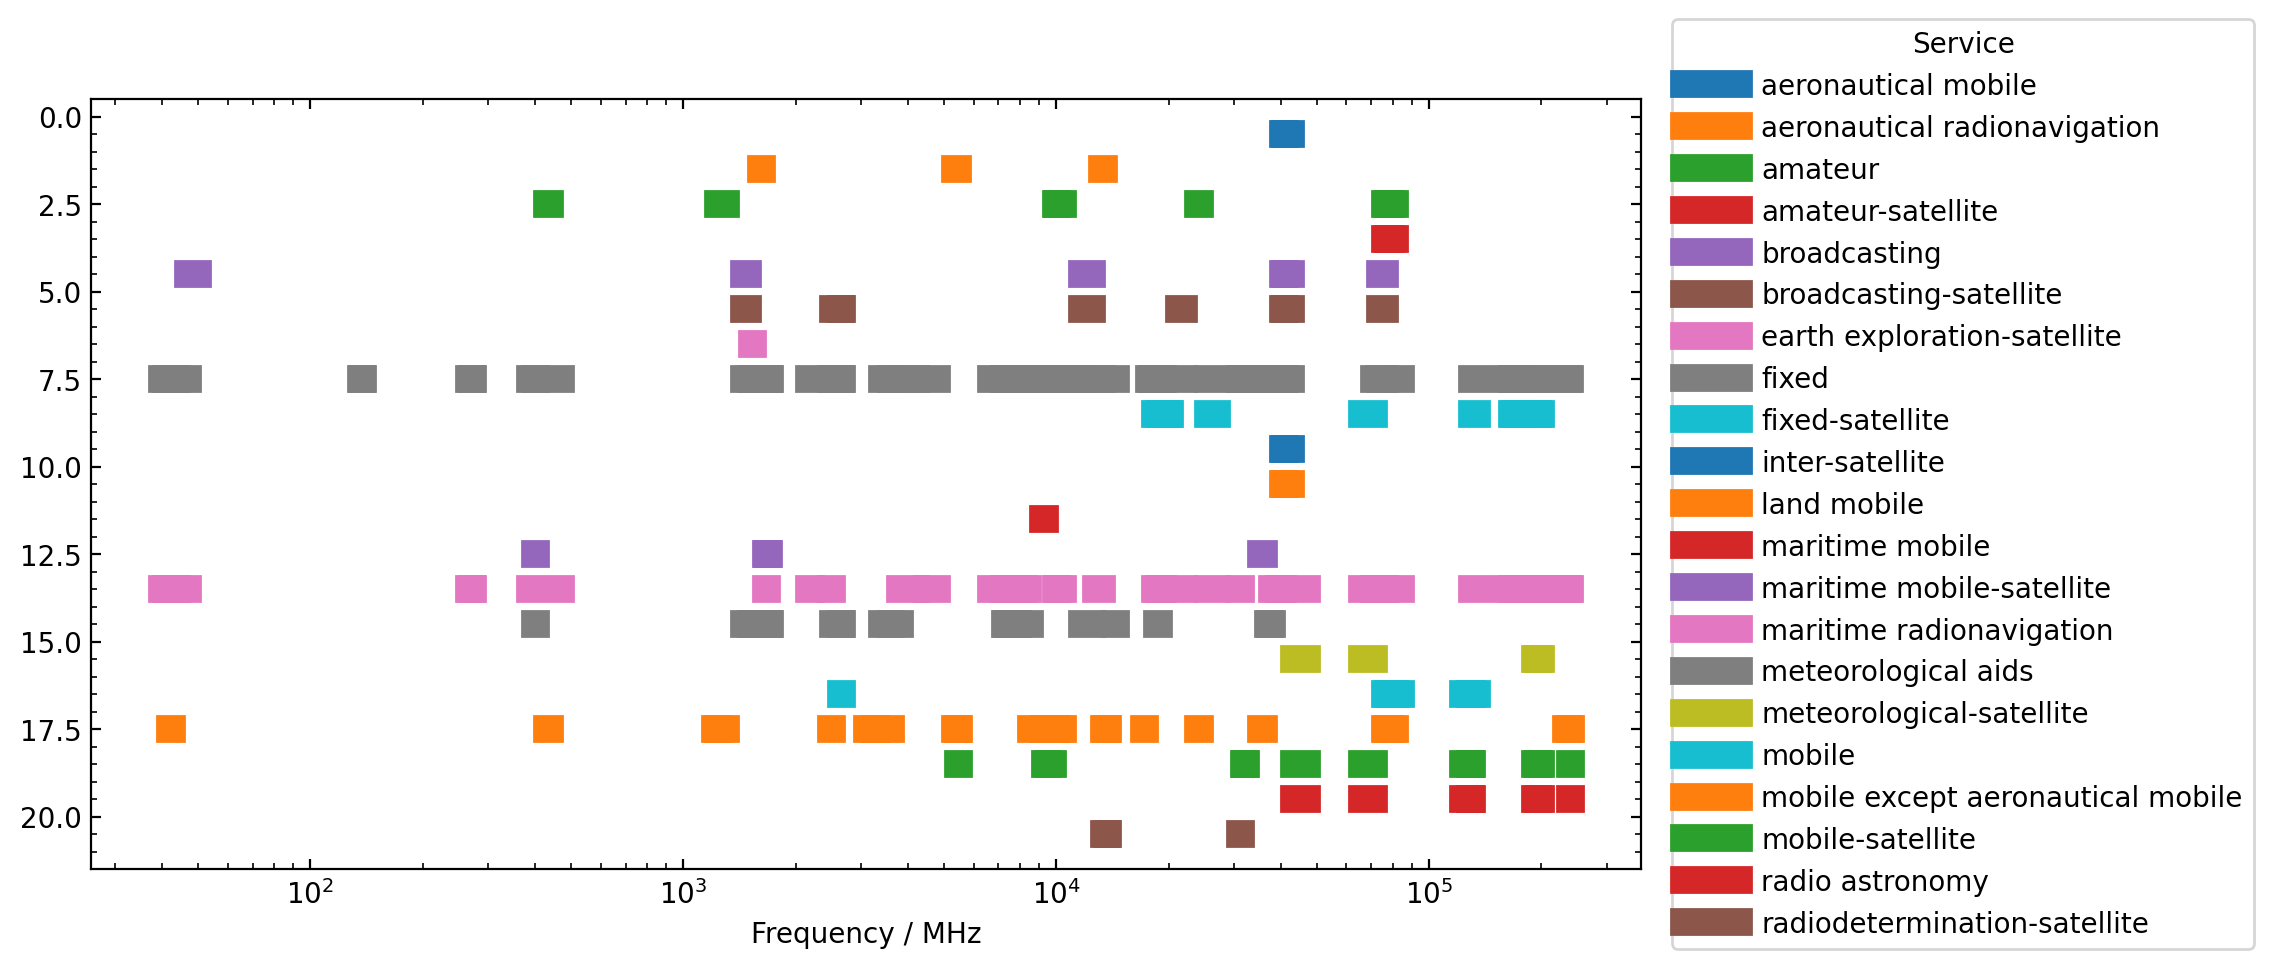

In [20]:
fig, ax = plt.subplots(figsize=[10, 5])
ax.set_xscale("log")

# Use Matplotlib's default color cycle
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_map = {service: colors[i % len(colors)] for i, service in enumerate(services)}
handles = []
i_row = 0
for i_service, service in enumerate(services):
    color = color_map[service]
    any_bands = False
    for b in relevant_bands:
        if b.has_allocation(service):
            any_bands = True
            (line,) = ax.plot(
                pint.Quantity.from_sequence(b.bounds).to(ureg.MHz),
                i_row * np.ones(2) + 0.5,
                linewidth=10,
                color=color,
            )
    # Create one representative handle per service for the legend
    if any_bands:
        handles.append(line)
        i_row += 1

# Legend outside the axes on the right
ax.legend(
    handles,
    services,
    title="Service",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0,
)
ax.set_xlabel("Frequency / MHz")
ax.invert_yaxis()